In [23]:
import pandas as pd
%matplotlib inline

# Suponiendo que tu dataset está en un archivo CSV
df = pd.read_csv('data/arxiv_papers.csv')

# Explorar las primeras filas para entender los datos
print(df.head())


                                               title  \
0    MetaFormer is Actually What You Need for Vision   
1     Turbo Autoencoder with a Trainable Interleaver   
2  Ab-initio calculation of point defect equilibr...   
3  Divergent electrostriction at ferroelectric ph...   
4  ProxyFL: Decentralized Federated Learning thro...   

                                            abstract  \
0  Transformers have shown great potential in com...   
1  A critical aspect of reliable communication in...   
2  Point defects are responsible for a wide range...   
3  We investigate the electrostrictive response a...   
4  Institutions in highly regulated domains such ...   

                   published  \
0  2021-11-22T18:52:03+00:00   
1  2021-11-22T18:37:03+00:00   
2  2021-11-22T17:11:17+00:00   
3  2021-11-22T17:00:32+00:00   
4  2021-11-22T16:47:39+00:00   

                                             authors  \
0  ['Weihao Yu', 'Mi Luo', 'Pan Zhou', 'Chenyang ...   
1  ['Karl Chahine', '

In [52]:
df["abstract"][0]

'Transformers have shown great potential in computer vision tasks. A common\nbelief is their attention-based token mixer module contributes most to their\ncompetence. However, recent works show the attention-based module in\ntransformers can be replaced by spatial MLPs and the resulted models still\nperform quite well. Based on this observation, we hypothesize that the general\narchitecture of the transformers, instead of the specific token mixer module,\nis more essential to the model\'s performance. To verify this, we deliberately\nreplace the attention module in transformers with an embarrassingly simple\nspatial pooling operator to conduct only the most basic token mixing.\nSurprisingly, we observe that the derived model, termed as PoolFormer, achieves\ncompetitive performance on multiple computer vision tasks. For example, on\nImageNet-1K, PoolFormer achieves 82.1% top-1 accuracy, surpassing well-tuned\nvision transformer/MLP-like baselines DeiT-B/ResMLP-B24 by 0.3%/1.1% accuracy\

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Transformar los abstracts a una matriz TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['abstract'])

# Aplicar NMF para la extracción de tópicos
nmf = NMF(n_components=5, random_state=1).fit(tfidf)

# Mostrar los tópicos
feature_names = tfidf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Tópico #{topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))


Tópico #0:
learning training neural models model graph networks deep tasks network
Tópico #1:
control problem algorithm optimization time proposed optimal design method based
Tópico #2:
image images segmentation features object attention 3d feature detection information
Tópico #3:
data ai systems research design user software human users development
Tópico #4:
quantum optical spin states magnetic materials qubit field high phase


In [25]:
df['authors'][8]

"['Michelle Hickner', 'Urban Fasel', 'Aditya G. Nair', 'Bingni W. Brunton', 'Steven L. Brunton']"

In [26]:
import networkx as nx

# Crear un grafo vacío
G = nx.Graph()

# Añadir nodos y aristas basados en coautorías
for authors in df['authors']:
    authors_list = authors.split(", ")
    for author in authors_list:
        G.add_node(author)
    for author1 in authors_list:
        for author2 in authors_list:
            if author1 != author2:
                G.add_edge(author1, author2)

# Graficar el grafo
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
nx.draw_networkx(G, with_labels=False)
plt.show()


KeyboardInterrupt: 

<Figure size 1200x1200 with 0 Axes>

In [27]:
# Seleccionar una submuestra aleatoria del DataFrame
# Por ejemplo, el 10% de los datos
df_sample = df.sample(frac=0.1)

# Crear un grafo basado en la submuestra
G = nx.Graph()

for authors in df_sample['authors']:
    authors_list = authors.split(", ")
    for author in authors_list:
        G.add_node(author)
    for author1 in authors_list:
        for author2 in authors_list:
            if author1 != author2:
                G.add_edge(author1, author2)

In [28]:
max_authors_per_document = 5

G = nx.Graph()

for authors in df['authors']:
    authors_list = authors.split(", ")[:max_authors_per_document]

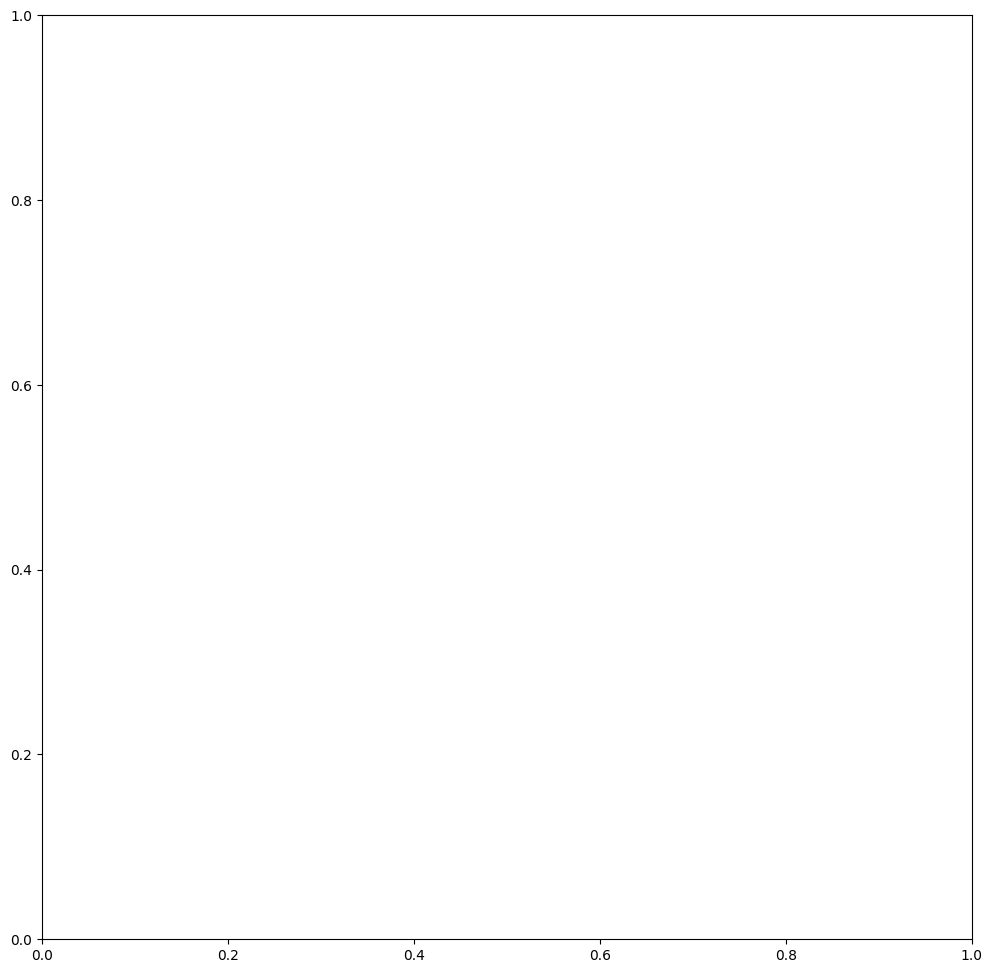

In [29]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.15)  # Ajusta el parámetro 'k' según sea necesario
nx.draw_networkx(G, pos, with_labels=False, node_size=50, edge_color='gray')
plt.show()

In [30]:
# Tomar solo el componente más grande
largest_cc = max(nx.connected_components(G), key=len)
subgraph = G.subgraph(largest_cc)

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(subgraph)
nx.draw_networkx(subgraph, pos, with_labels=False)
plt.show()

ValueError: max() arg is an empty sequence

In [20]:
print("Nodos en G:", G.number_of_nodes())
print("Aristas en G:", G.number_of_edges())

Nodos en G: 0
Aristas en G: 0


In [31]:
import spacy
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from spacy import displacy

In [34]:
# Suponiendo que tu dataset está en un archivo CSV
df = pd.read_csv('data/arxiv_papers.csv')

df_subset = df.head(5)

df_subset

,title,abstract,published,authors,url
0,MetaFormer is Actually What You Need for Vision,Transformers have shown great potential in com...,2021-11-22T18:52:03+00:00,"['Weihao Yu', 'Mi Luo', 'Pan Zhou', 'Chenyang ...",http://arxiv.org/abs/2111.11418v1
1,Turbo Autoencoder with a Trainable Interleaver,A critical aspect of reliable communication in...,2021-11-22T18:37:03+00:00,"['Karl Chahine', 'Yihan Jiang', 'Pooja Nuti', ...",http://arxiv.org/abs/2111.11410v1
2,Ab-initio calculation of point defect equilibr...,Point defects are responsible for a wide range...,2021-11-22T17:11:17+00:00,"['Mubashir Mansoor', 'Mehya Mansoor', 'Maryam ...",http://arxiv.org/abs/2111.11359v1
3,Divergent electrostriction at ferroelectric ph...,We investigate the electrostrictive response a...,2021-11-22T17:00:32+00:00,"['Daniel S. P. Tanner', 'Pierre-Eymeric Janoli...",http://arxiv.org/abs/2111.11352v1
4,ProxyFL: Decentralized Federated Learning thro...,Institutions in highly regulated domains such ...,2021-11-22T16:47:39+00:00,"['Shivam Kalra', 'Junfeng Wen', 'Jesse C. Cres...",http://arxiv.org/abs/2111.11343v1


In [48]:
nlp = spacy.load('en_core_web_lg')

def extract_entities_relations(doc):
    relations = []
    for ent in doc.ents:
        # Buscar si el token siguiente al final de la entidad es un verbo
        if ent.end < len(doc):
            next_token = doc[ent.end]
            if next_token.pos_ == "VERB":
                # Buscar la siguiente entidad después del verbo
                following_ents = [e for e in doc.ents if e.start > next_token.i]
                if following_ents:
                    relations.append((ent.text, next_token.text, following_ents[0].text))
    return relations

# Aplicar la función a cada abstract
df_subset['relations'] = df_subset['abstract'].apply(lambda x: extract_entities_relations(nlp(x)))

/var/folders/3_/bsh490990pv6w7gjtmjv6qy80000gn/T/ipykernel_55748/342391833.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['relations'] = df_subset['abstract'].apply(lambda x: extract_entities_relations(nlp(x)))


In [42]:
# Esta función crea un DataFrame para un abstract específico
def create_knowledge_graph_df(entities_relations):
    graph_data = {'subject': [], 'relation': [], 'object': []}
    for relation in entities_relations[1]:  # Las relaciones están en el segundo elemento
        graph_data['subject'].append(relation[0])
        graph_data['relation'].append(relation[1])
        graph_data['object'].append(relation[2])
    return pd.DataFrame(graph_data)

knowledge_graphs = df_subset['entities_relations'].apply(create_knowledge_graph_df)


In [43]:
knowledge_graphs

0             subject  relation       object
0   Tr...
1      subject     relation     object
0  aspect   ...
2       subject      relation       object
0  diamo...
3      subject     relation         object
0      W...
4            subject    relation          object
0 ...
Name: entities_relations, dtype: object

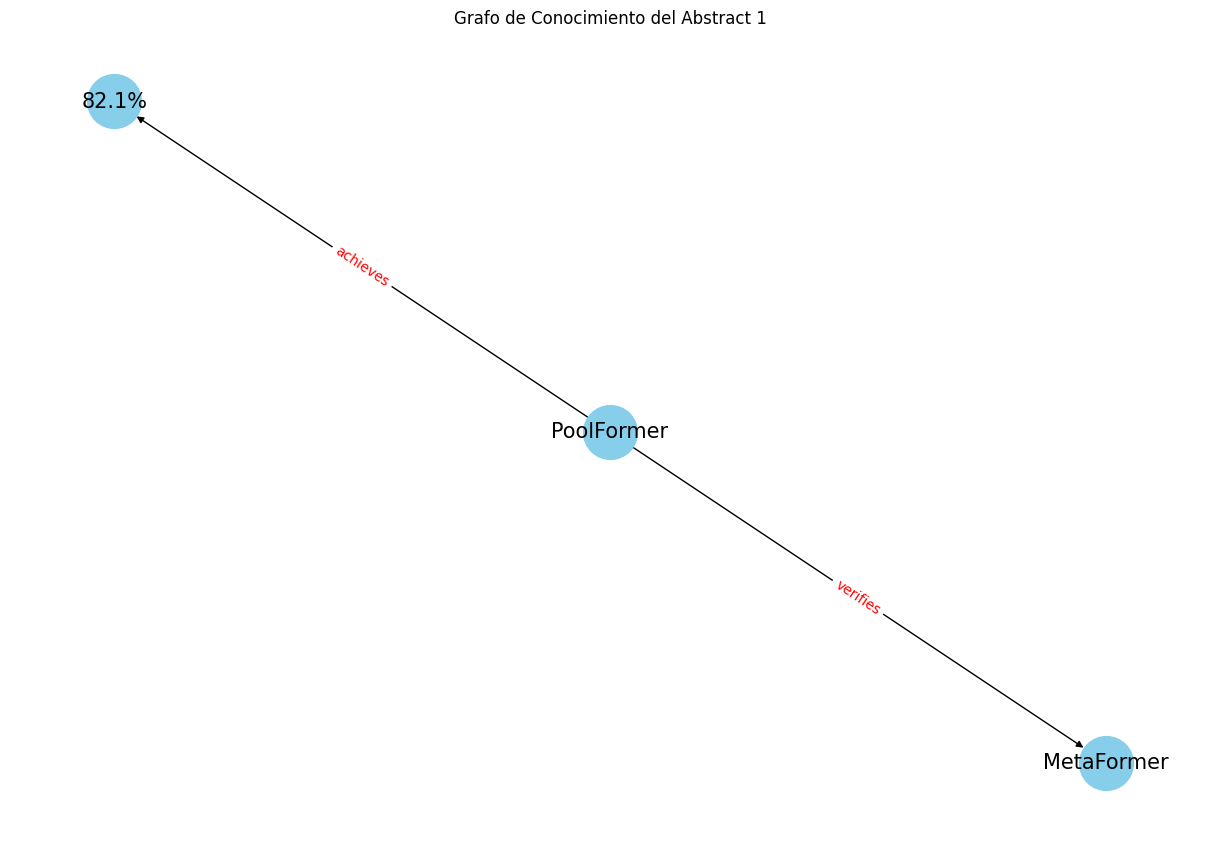

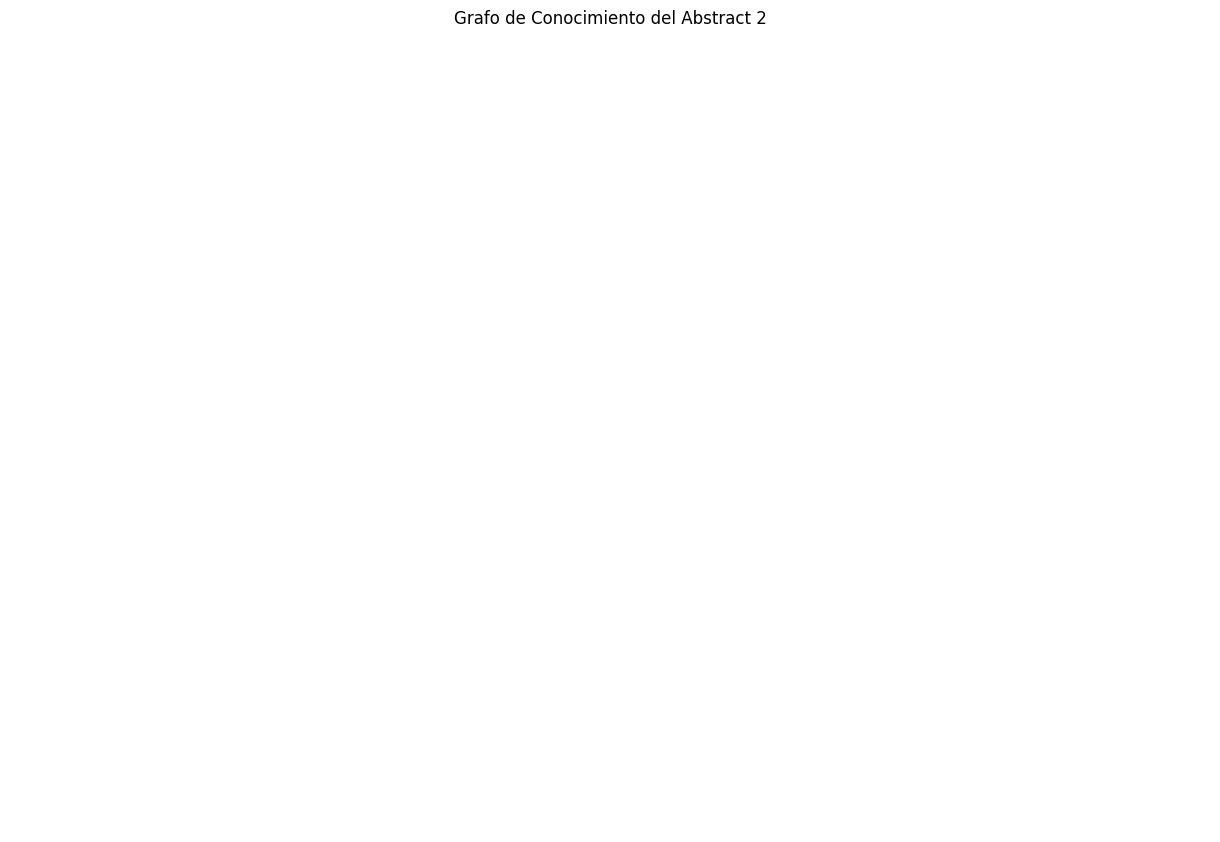

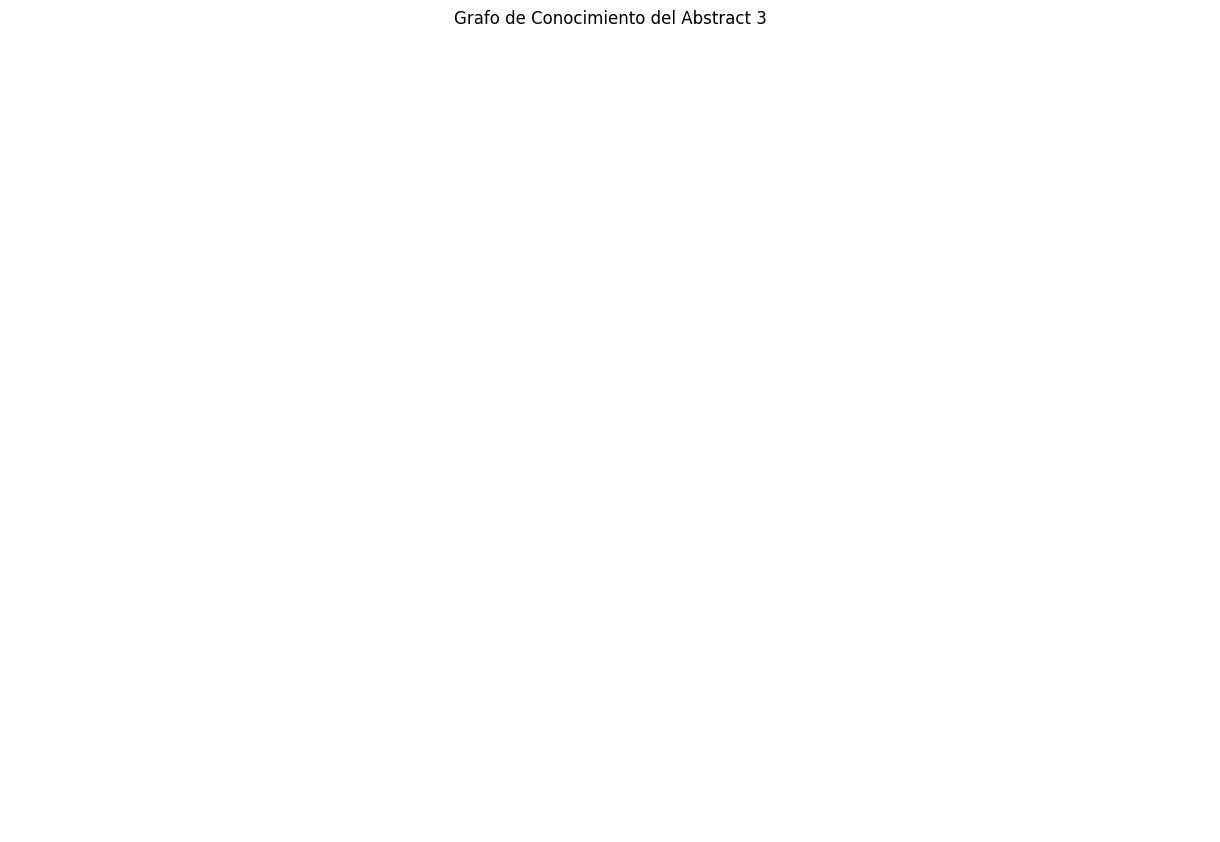

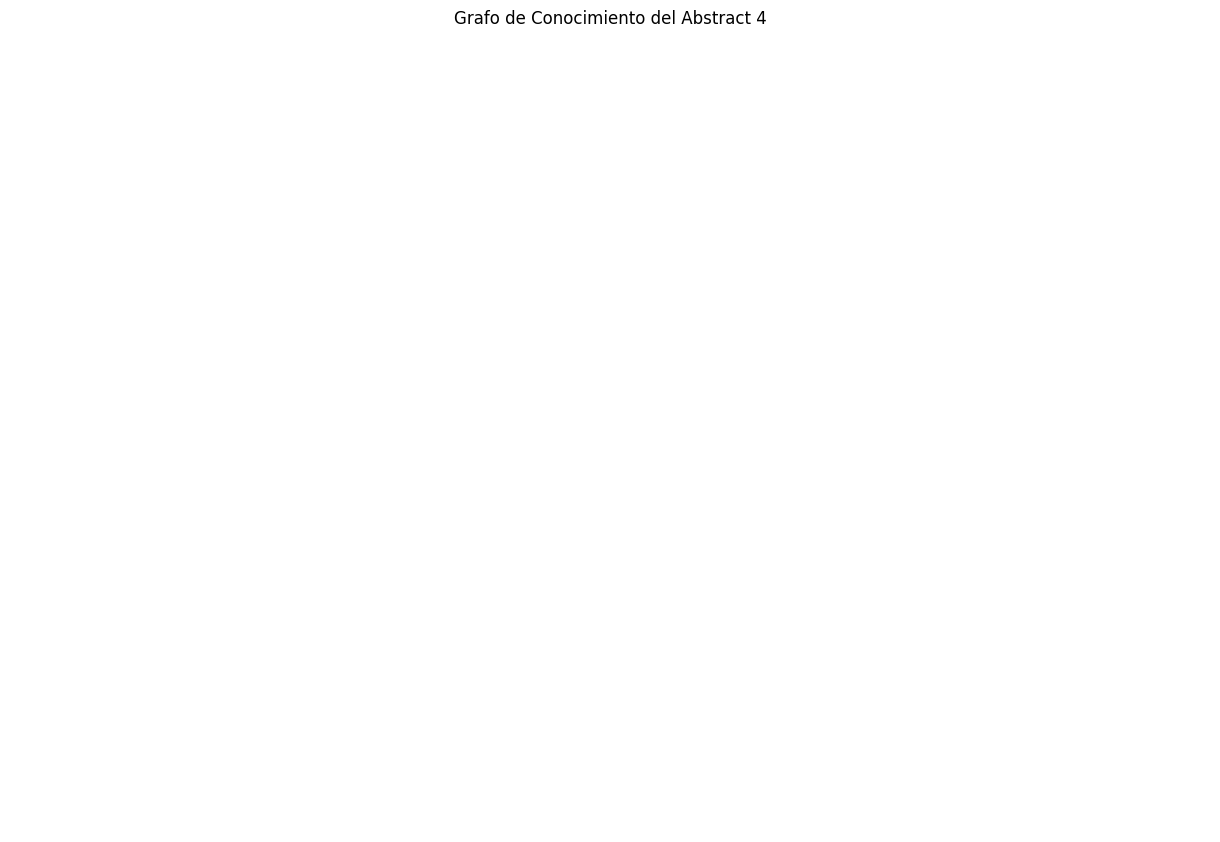

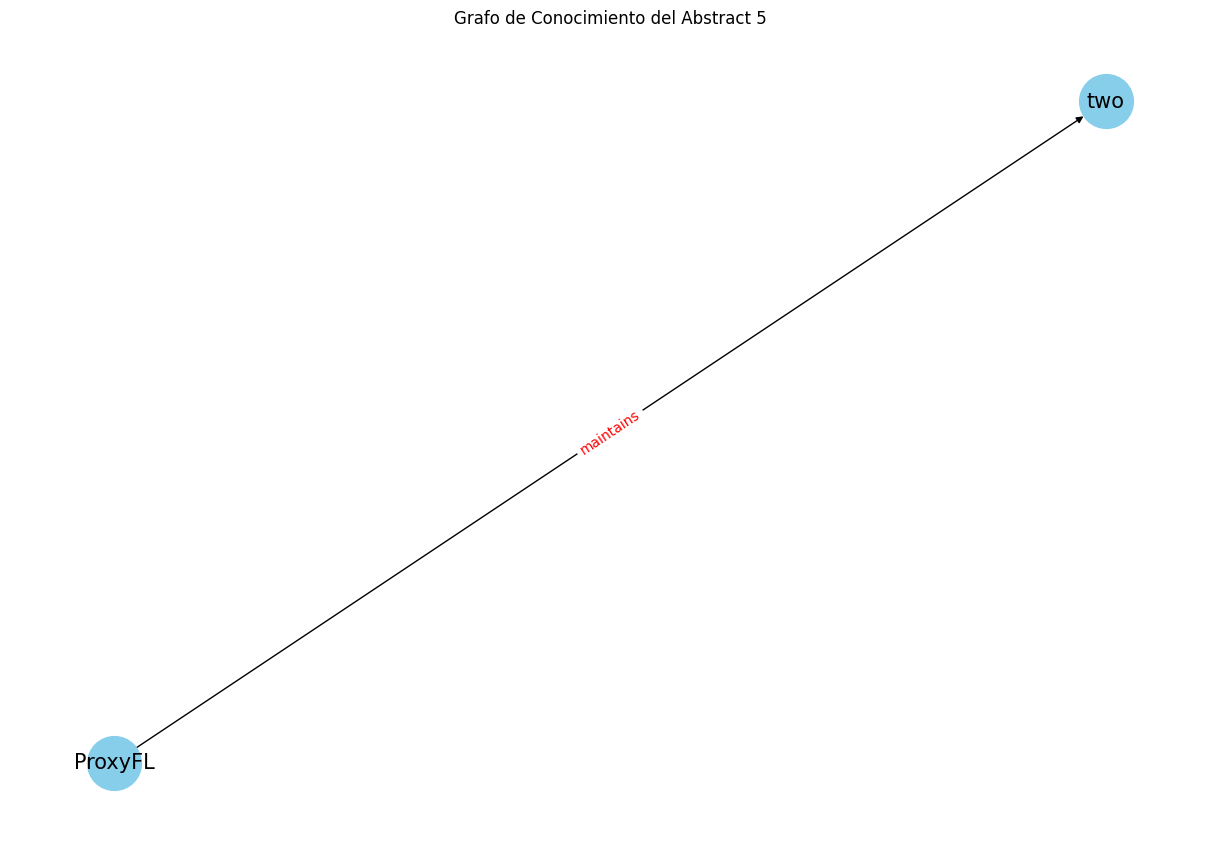

In [50]:
for i, relations in enumerate(df_subset['relations']):
    plt.figure(figsize=(12, 8))
    G = nx.DiGraph()

    # Añadir los nodos y las aristas
    for rel in relations:
        G.add_node(rel[0])
        G.add_node(rel[2])
        G.add_edge(rel[0], rel[2], relation=rel[1])

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='black', linewidths=1, font_size=15)

    # Dibujar las etiquetas de las relaciones en las aristas
    edge_labels = nx.get_edge_attributes(G, 'relation')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    plt.title(f'Grafo de Conocimiento del Abstract {i+1}')
    plt.show()